In [60]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

In [61]:
# ********************************************************************************************************************************
# 1. Загрузить файл hr.csv (можно найти во вложении к заданию)
# ********************************************************************************************************************************

In [79]:
data = pd.read_csv('D:\Python\Дипломная работа Питон\HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [30]:
# *******************************************************************************************************************************
# 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
# *******************************************************************************************************************************

In [31]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [32]:
# ********************************************************************************************************************************
# 3. Рассчитать и визуализировать корреляционную матрицу для переменных
# ********************************************************************************************************************************

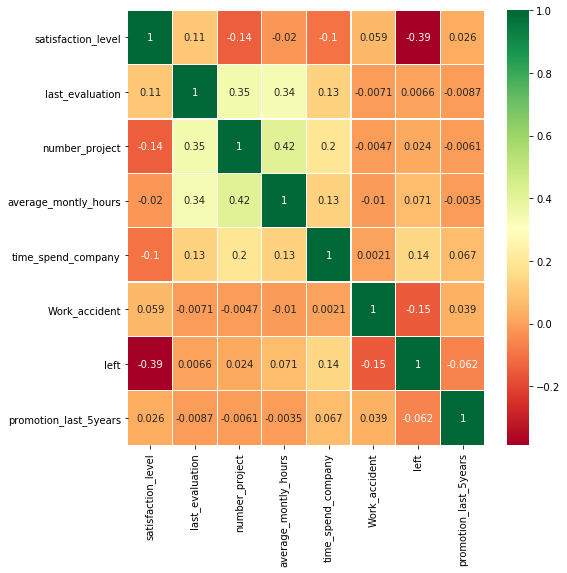

In [33]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(8,8)
plt.show()

In [34]:
# Наблюдается сильная обратная корреляция между уровнем удовлетворенности сотрудников и количеством увольнений.

In [35]:
# ******************************************************************************************************************************
# 4. Визуализировать несколько взаимосвязей между переменными
# ******************************************************************************************************************************

In [36]:
x = data['satisfaction_level']
x.head()
y = data['time_spend_company']
y.head()

0    3
1    6
2    4
3    5
4    3
Name: time_spend_company, dtype: int64

Коэффициент корреляции Пирсона: -0.10086607257796579


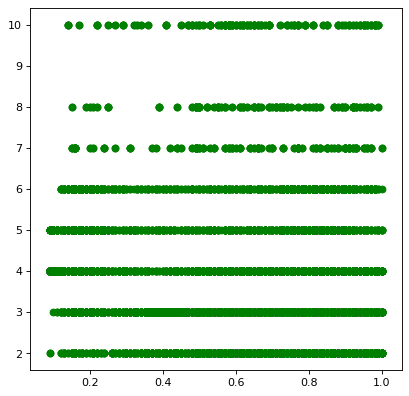

In [37]:
from scipy.stats import pearsonr
fig=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
corr, p_value = pearsonr(x, y)
plt.scatter(x, y,c = "g", marker='o')
print('Коэффициент корреляции Пирсона:', corr)

In [38]:
# Данная визуализация говорит о том, что показатель уровня удовлетворенности выше у работников, проработавших в компании
# более 6 лет.

In [39]:
data_salary_categ = data.pivot_table(index = ['time_spend_company'], columns = ['left'], values = 'satisfaction_level',\
                                     aggfunc='count')
data_salary_categ.fillna(0, inplace = True)
data_salary_categ

left,0,1
time_spend_company,,
2,3191.0,53.0
3,4857.0,1586.0
4,1667.0,890.0
5,640.0,833.0
6,509.0,209.0
7,188.0,0.0
8,162.0,0.0
10,214.0,0.0


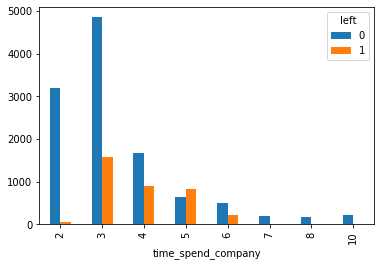

In [40]:
data_salary_categ.plot(kind = 'bar')

In [41]:
# Наибольшее количество сотрудников уволилось, проработав от 3 до 5 лет.

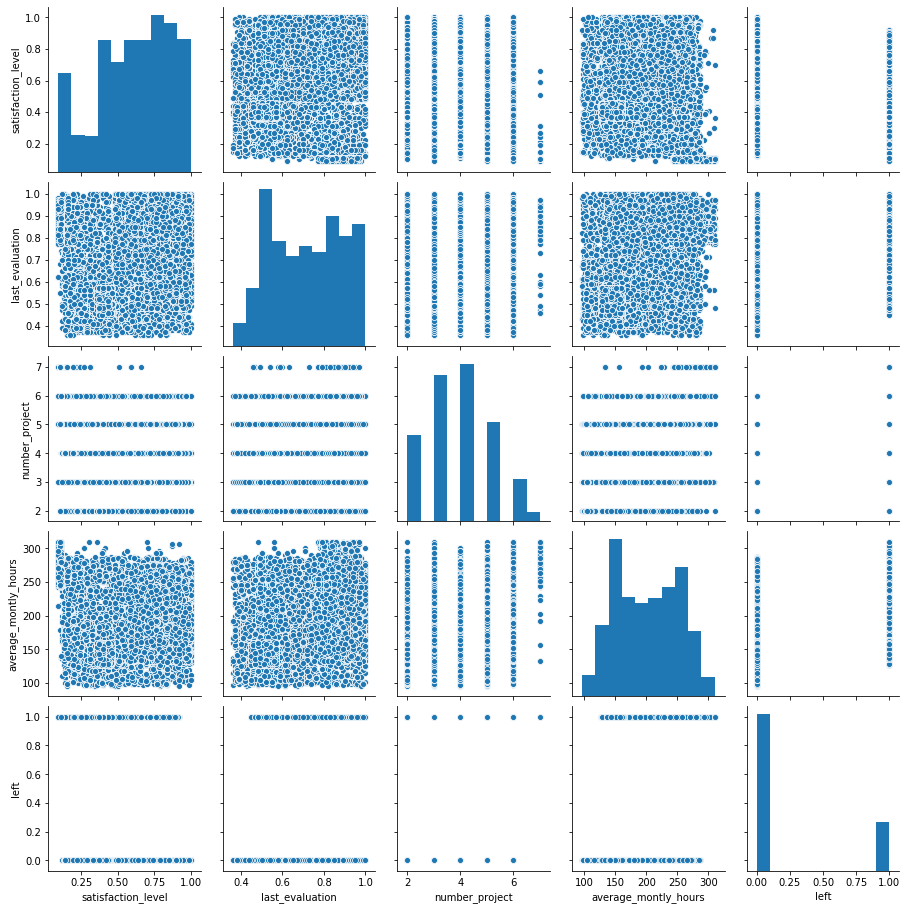

In [42]:
sns.pairplot(data, vars = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'left'], kind = 'scatter' )

In [43]:
# ******************************************************************************************************************************
# 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными
# ******************************************************************************************************************************

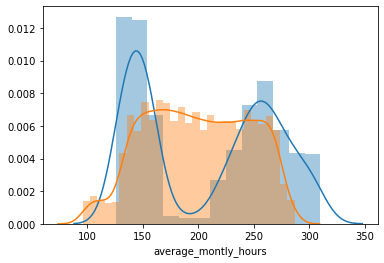

In [44]:
left_group = data[data['left'] == 1]['average_montly_hours']
stay_group = data[data['left'] == 0]['average_montly_hours']
# left_group

sns.distplot(left_group)
sns.distplot(stay_group)

In [45]:
left_group = left_group.sample(20)
stay_group = stay_group.sample(20)
stats.ttest_ind(left_group, stay_group)

Ttest_indResult(statistic=-0.5494192767923529, pvalue=0.5859323276257595)

In [46]:
p-value больше 0.05, поэтому мы принимаем нулевую гипотезу

SyntaxError: invalid syntax (<ipython-input-46-8013d6dbf525>, line 1)

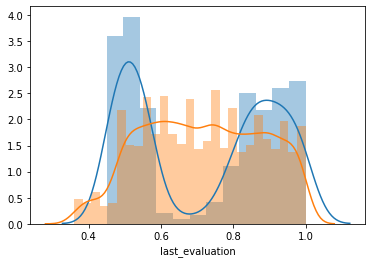

In [47]:
left_group = data[data['left'] == 1]['last_evaluation']
stay_group = data[data['left'] == 0]['last_evaluation']
# left_group
sns.distplot(left_group)
sns.distplot(stay_group)

In [48]:
left_group = left_group.sample(20)
stay_group = stay_group.sample(20)

stats.ttest_ind(left_group, stay_group)

Ttest_indResult(statistic=-1.1214335608928026, pvalue=0.2691402001796325)

In [49]:
# p-value равно 0.32, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать,
# что не имеется статистическое различие между уволенными и оставшимися работать в компании в целом.

# По графику мы видим, что сотрудники, продолжающие работать в компании, имеют более равномерное распределение 
# оценок работы, чем уволенные.
# У уволенных сотрудников оценки либо высокие, либо низкие.

In [50]:
# *****************************************************************************************************************************
# 6. Рассчитать сколько работников работает в каждом департаменте
# *****************************************************************************************************************************

In [51]:
data_salaries = data.groupby('sales')['sales'].count()
print(data_salaries)
len(data)
                 
#  df['count_price'] = df.groupby('AveragePrice')['AveragePrice'].count()                

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: sales, dtype: int64


14999

In [52]:
# ******************************************************************************************************************************
# 7. Показать распределение сотрудников по зарплатам
# ******************************************************************************************************************************

In [53]:
data_department = data.groupby('salary')['salary'].count()
print(data_department)

salary
high      1237
low       7316
medium    6446
Name: salary, dtype: int64


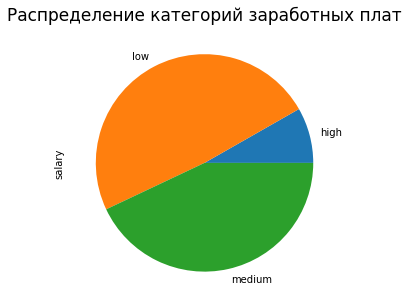

In [54]:
plt.figure(figsize=(5, 5))
plt.title('Распределение категорий заработных плат', fontsize=17)
data_department.plot(kind = 'pie')

In [63]:
data_salary_categ = data.groupby(['sales','salary']).count()['satisfaction_level']
data_salary_categ.head()

sales  salary
IT     high       83
       low       609
       medium    535
RandD  high       51
       low       364
Name: satisfaction_level, dtype: int64

In [56]:
# ******************************************************************************************************************************
# 8. Показать распределение сотрудников по зарплатам совместно с департаментами
# ******************************************************************************************************************************

In [64]:
data_salary_categ = data.pivot_table(index = ['sales'], columns = ['salary'], values = 'satisfaction_level',aggfunc='count')
data_salary_categ

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


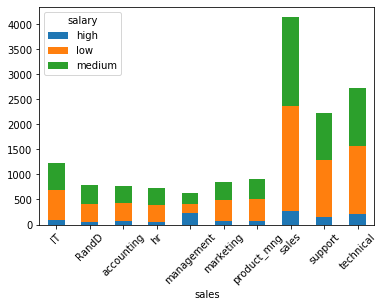

In [66]:
data_salary_categ[list( data_salary_categ.columns)]\
    .plot(kind='bar', rot=45, stacked=True)

In [67]:
# *****************************************************************************************************************************
# 9. Сколько сотрудников покинули компанию
# *****************************************************************************************************************************

In [68]:
data_left = data[data['left'] == 1]
print("Количество сотрудников, покинувших компанию: ", len(data_left))
print("Процент сотрудников, покинувших компанию: ", round(len(data_left)/len(data)*100,1), "%")

Количество сотрудников, покинувших компанию:  3571
Процент сотрудников, покинувших компанию:  23.8 %


In [69]:
# ****************************************************************************************************************************
 #10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию
# ****************************************************************************************************************************

#### Гипотеза 1. Сотрудники с разными уровнями зарплаты увольняются с одинаковой частотой

In [26]:
data_1 = data.pivot_table(index = ['salary'], columns = ['left'], values = 'satisfaction_level',\
                                     aggfunc='count')
data_1.fillna(0, inplace = True)
data_1

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


In [ ]:
Уровней зарплаты больше двух, поэтому используем множественный тест (ANOVA)

In [15]:
high_salary = data[data['salary']=='high']['left']

low_salary = data[data['salary']=='low']['left']

medium_salary = data[data['salary']=='medium']['left']

high_salary = restecg_0.sample(20)
low_salary = restecg_1.sample(20)
medium_salary = restecg_2.sample(20)

stats.f_oneway(restecg_0, restecg_1, restecg_2)

F_onewayResult(statistic=3.304347826086955, pvalue=0.043874625106750706)

In [ ]:
# pvalue < 0.05 Выборки различны. Уровень заработной платы влияет на количество уволенных людей.

#### Гипотеза 2. Сотрудники, не получившие повышения, увольняются так же часто, как сотрудники с карьерным ростом

In [75]:
data_2 = data.pivot_table(index = ['promotion_last_5years'], columns = ['left'], values = 'satisfaction_level',\
                                     aggfunc='count')
data_2.fillna(0, inplace = True)
data_2

left,0,1
promotion_last_5years,,
0,11128,3552
1,300,19


In [81]:
left_group2 = data[data['left'] == 1]['promotion_last_5years']
stay_group2 = data[data['left'] == 0]['promotion_last_5years']

left_group2 = left_group2.sample(20)
stay_group2 = stay_group2.sample(20)

stats.ttest_ind(left_group2, stay_group2)

Ttest_indResult(statistic=-1.4529663145135576, pvalue=0.15444172531879208)

In [ ]:
pvalue > 0.05, поэтому мы принимаем нулевую гипотезу

#### Гипотеза 3. Несчастные случаи на работе не влияют на увольнения

In [82]:
data_3 = data.pivot_table(index = ['Work_accident'], columns = ['left'], values = 'satisfaction_level',\
                                     aggfunc='count')
data_3.fillna(0, inplace = True)
data_3

left,0,1
Work_accident,,
0,9428,3402
1,2000,169


In [84]:
left_group3 = data[data['left'] == 1]['Work_accident']
stay_group3 = data[data['left'] == 0]['Work_accident']

left_group3 = left_group3.sample(20)
stay_group3 = stay_group3.sample(20)

stats.ttest_ind(left_group3, stay_group3)

Ttest_indResult(statistic=-1.4353539507227553, pvalue=0.15936681228917182)

In [ ]:
pvalue > 0.05, поэтому мы принимаем

#### Гипотеза 4. Уровень удовлетворенности людей перед увольнением остается на прежнем уровне

In [86]:
left_group4 = data[data['left'] == 1]['satisfaction_level']
stay_group4 = data[data['left'] == 0]['satisfaction_level']

left_group4 = left_group4.sample(20)
stay_group4 = stay_group4.sample(20)

stats.ttest_ind(left_group4, stay_group4)

Ttest_indResult(statistic=-2.792650138149162, pvalue=0.008140323131617102)

In [ ]:
pvalue < 0.05, поэтому мы отвергаем нулевую гипотезу

#### На основании проведенной работы можно сделать вывод, что наиболее подвержены увольнениям люди, проработавшие от 3 до 5 лет, с низким уровнем заработной платы, не получившие повышения. Наибольшая корреляция наблюдается с показателем удовлетворенности людей, но этот признак является вполне естественным перед увольнением и является не причиной, а следствием других критериев. Также увольняются наиболее загруженные по количеству рабочих часов сотрудники.